음성 데이터에서 특징을 수치로 빼낸 데이터

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', color_codes=True)
import xlrd
import statsmodels.formula.api as smf
import scipy as sp
import sklearn
from sklearn import linear_model

In [3]:
rf = pd.read_csv("Final_Revised_0415_3.csv")
rf.tail(3)

,sex,Smoking,Alcohol,Coffev,Voice_user,Jitter_Pre,Jitter_Post,Shimmer_Pre,Shimmer_Post,NHR_Pre,NHR_Post,Effectiveness
40,1,0,1,0,1,3.359,0.548,4.365,2.525,0.158,0.120,1
41,2,0,0,0,0,1.631,0.602,3.376,2.117,0.146,0.099,1
42,1,0,0,0,0,2.921,0.870,10.376,4.462,0.155,0.132,0


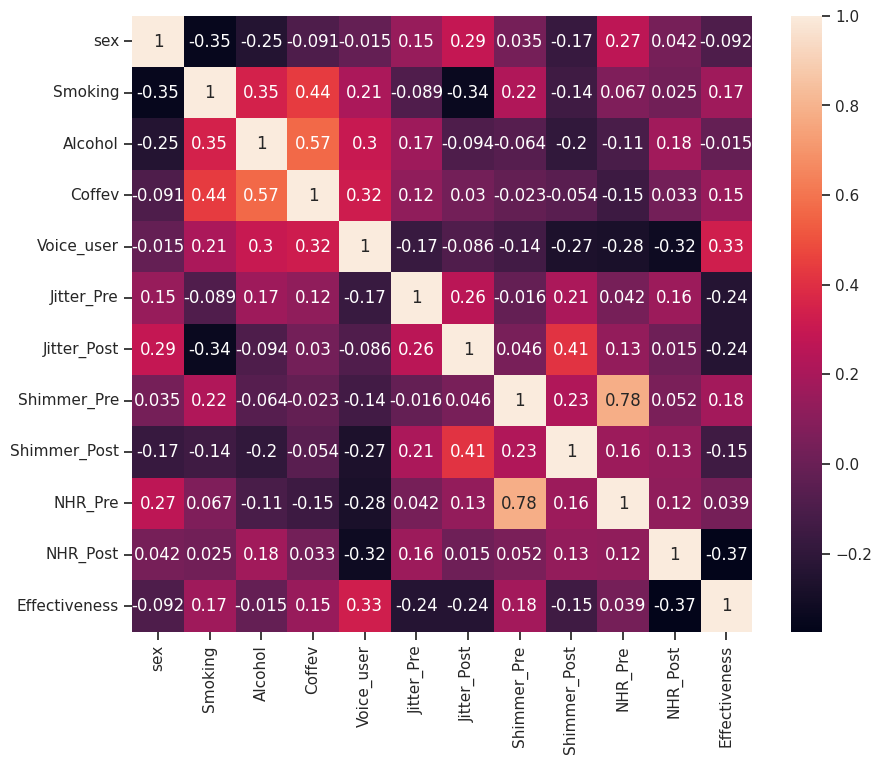

In [9]:
selection1 = ['sex','Smoking','Alcohol','Coffev','Voice_user','Jitter_Pre','Jitter_Post','Shimmer_Pre','Shimmer_Post','NHR_Pre','NHR_Post','Effectiveness']
rf1 = pd.read_csv("Final_Revised_0415_3.csv", usecols=selection1)
compare_feature = rf1.corr()
plt.figure(figsize=(10,8))
draw = sns.heatmap(compare_feature, annot=True)
plt.show(draw)

In [10]:
compare_feature

,sex,Smoking,Alcohol,Coffev,Voice_user,Jitter_Pre,Jitter_Post,Shimmer_Pre,Shimmer_Post,NHR_Pre,NHR_Post,Effectiveness
sex,1.000000,-0.348017,-0.245614,-0.090510,-0.015284,0.145045,0.290044,0.035002,-0.172514,0.269176,0.041803,-0.092352
Smoking,-0.348017,1.000000,0.348017,0.436564,0.207900,-0.088812,-0.337453,0.224447,-0.144099,0.066671,0.025150,0.170630
Alcohol,-0.245614,0.348017,1.000000,0.565134,0.296946,0.166067,-0.093927,-0.063544,-0.195408,-0.107433,0.175820,-0.014976
Coffev,-0.090510,0.436564,0.565134,1.000000,0.318701,0.121081,0.030353,-0.022634,-0.054397,-0.153972,0.032694,0.150756
Voice_user,-0.015284,0.207900,0.296946,0.318701,1.000000,-0.166314,-0.086473,-0.135487,-0.270605,-0.283376,-0.323881,0.333008
Jitter_Pre,0.145045,-0.088812,0.166067,0.121081,-0.166314,1.000000,0.257059,-0.015648,0.208152,0.041534,0.160533,-0.236146
Jitter_Post,0.290044,-0.337453,-0.093927,0.030353,-0.086473,0.257059,1.000000,0.046192,0.414128,0.134811,0.014650,-0.239005
Shimmer_Pre,0.035002,0.224447,-0.063544,-0.022634,-0.135487,-0.015648,0.046192,1.000000,0.225119,0.782188,0.051846,0.180130
Shimmer_Post,-0.172514,-0.144099,-0.195408,-0.054397,-0.270605,0.208152,0.414128,0.225119,1.000000,0.158414,0.134755,-0.146214
NHR_Pre,0.269176,0.066671,-0.107433,-0.153972,-0.283376,0.041534,0.134811,0.782188,0.158414,1.000000,0.121700,0.038699


In [11]:
linear_regression=linear_model.LinearRegression()

In [14]:
selection2 = ['sex','Smoking','Alcohol','Coffev','Voice_user','Jitter_Pre','Jitter_Post','Shimmer_Pre','Shimmer_Post','NHR_Pre','NHR_Post']
rf2 = pd.read_csv("Final_Revised_0415_3.csv", usecols=selection2)

selection3 = ['Effectiveness']
rf3 = pd.read_csv("Final_Revised_0415_3.csv", usecols=selection3)

In [15]:
linear_regression.fit(X=rf2, y=rf3)

LinearRegression()

In [16]:
prediction=linear_regression.predict(X=rf2)

In [17]:
linear_regression.intercept_

array([1.29047922])

In [18]:
linear_regression.coef_

array([[-6.23254849e-02, -9.13013451e-02, -1.28418678e-01,
         2.00136763e-01,  2.03972300e-01, -2.13106107e-03,
        -1.83762608e-01,  1.94801334e-02, -8.17367006e-03,
         1.79328305e-01, -4.32554703e+00]])

In [19]:
residuals = rf3 - prediction
residuals.describe()

,Effectiveness
count,4.300000e+01
mean,-1.549148e-16
std,3.616768e-01
min,-7.891229e-01
25%,-2.223050e-01
50%,5.763625e-02
75%,2.609234e-01
max,6.538533e-01


In [20]:
SSE = (residuals**2).sum()
SST = ((rf3 - rf3.mean())**2).sum()
R_squared = 1 - (SSE/SST)

In [21]:
R_squared

Effectiveness    0.328855
dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(prediction, rf3))
print(mean_squared_error(prediction, rf3)**0.5)
#print(np.sqrt(mean_squared_error(prediction, rf3)))

0.12776804603090208
0.3574465638817949
